In [19]:
import pymc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#http://sabermetricinsights.blogspot.com/2014/05/bayesian-linear-regression-with-pymc.html


In [11]:
x = np.arange(0,9)
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

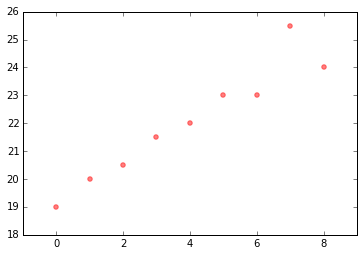

In [17]:
plt.scatter(x, y, color='red',alpha=0.5)
plt.show()

In [18]:
b0 = pymc.Normal("b0", 0, 0.0003)
b1 = pymc.Normal("b1", 0, 0.0003)
err = pymc.Uniform("err", 0, 500)

In [21]:
df = pd.DataFrame({
        'x': x, 'y': y
    })
df.head()

,x,y
0,0,19.0
1,1,20.0
2,2,20.5
3,3,21.5
4,4,22.0


In [23]:
x = pymc.Normal("x", 0, 1, value=np.array(df["x"]), observed=True)

In [25]:
@pymc.deterministic
def pred(b0=b0, b1=b1, x=x): return b0 + b1*x

In [28]:
y = pymc.Normal("y", pred, err, value=np.array(df["y"]), observed=True)

In [29]:
model = pymc.Model([pred, b0, b1, y, err, x])

In [31]:
mcmc = pymc.MCMC(model)

In [32]:
mcmc.sample(50000, 20000)

 [-----------------100%-----------------] 50000 of 50000 complete in 7.1 sec

0.717626488918


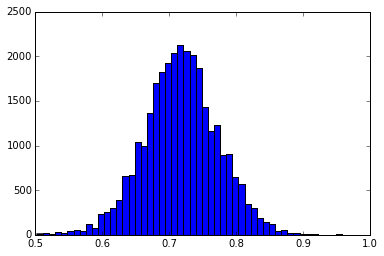

In [35]:
print np.mean(mcmc.trace('b1')[:]);
plt.hist(mcmc.trace('b1')[:], bins=50);

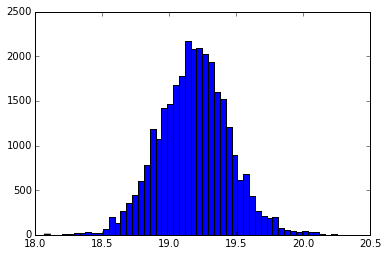

In [38]:
plt.hist(mcmc.trace('b0')[:], bins=50);